## 神经网络

感知机的好消息和坏消息:

+ 好消息：即便对于复杂的函数，感知机也隐含着能够表示它的可能性；
+ 坏消息：设定权重的工作，即确定合适的、能符合预期输入和输出的权重，都是人工进行的。

神经网络的出现就是为了解决上述的坏消息，神经网络的一个重要性质就是从它可以从数据中学习得到合适的权重参数。

### 从感知机到神经网络

#### 神经网络的例子

      如下图所示，左边的一列称为**输入层**，最右边的为**输出层**，中间的一列称为**中间层**，中间层有时也称为**隐藏层**，本教程把输入层到输出层称为 0层、1层、2层。

![神经网络的例子](./img/3-1.png)

神经网络的形状类似感知机，实际上，神经元连接方式就是与感知机没有任何差异。


#### 激活函数

**激活函数**(activation function)将输入信号的总和转为输出信号，作用在于如何激活输入信号的综合。

![激活函数](./img/activation_function.png)

先计算输入信号的加权总和，然后用激活函数来转换这一总和，公式转化得详细一点：

![激活函数](./img/activation_function-1.png)

激活函数的计算过程如下：

![激活函数计算过程](./img/activation_function-2.png)

本教程中，在可以明确神经网络动作的情况下，将在图中明确显示激活函数的计算过程：

![神经元内部显示激活函数计算过程](./img/activation_function-3.png)

**激活函数是连接感知机和神经网络的桥梁**！！

### 激活函数

#### sigmoid函数

    神经网络经常使用的一个激活函数就是**sigmoid函数**（sigmoid function）:

![sigmoid函数](./img/sigmoid_function.png)

式中 exp(-x)表示 e^-x 的意思，e 是纳皮尔常数 2.7182........。

神经网络使用sigmoid函数作为激活函数，进行信号转换，转换后的信号进入到下一个神经元。

#### sigmoid函数的实现
    

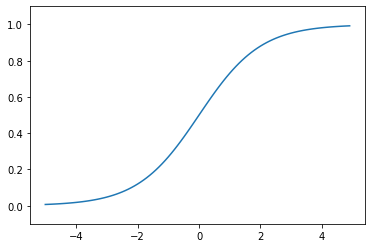

In [25]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid_function(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5,5,.1)
y = sigmoid_function(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

#### 越阶函数的实现

    越阶函数，激活函数以阈值为届，一旦输入超过阈值，就切换输出。

In [4]:
import numpy as np

def step_function(x):
    if x > 0:
        return 1
    else:
        return 0
    
# 将 x 转为支持 Numpy 数组的类型
def step_function_array(x):
    y = x > 0
    return y.astype(np.int) # astype() 转换numpy数组的类型

step_function_array(np.array([-1.0,1.0,2]))

array([0, 1, 1])

#### 越阶函数的图形

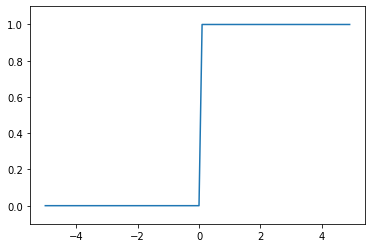

In [8]:
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0,dtype=np.int)

x = np.arange(-5,5,.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

# 图形呈阶梯式的变化，所以称为越阶函数

#### sigmoid函数和越阶函数的比较

相同点：
     1. 从宏观上讲，具有相似形状
     2. 输出值都介于 0 和 1 之间
     
不同点：
     1. 平滑性不同，sigmoid是一条平滑曲线（对神经网络具有重要意义），越阶函数以0为临界点，输出发生巨变
     2. 返回值不同，sigmoid返回0到1的小数值，而越阶函数只输出0或1
     
     
     
     
#### 非线性函数

    越阶函数和sigmoid函数都属于非线性函数，神经网络必须使用非线性函数，如果使用线性函数作为激活函数，那么加深神经网络的层数就没有意义了。
    
    例如：如果使用 h(x) = cx 作为激活函数，把 y(x) = h(h(h(x))) 的运算对应3层神经网络，这个运算会进行 y(x) = c*c*c*x ，基本上等于 y(x) = c^3*x，这一次乘法运算，使用线性函数作为激活函数，无法发挥出神经网络的优势。所以为了发挥叠加从带来的优势，神经网络必须使用非线性函数作为激活函数。
    
#### ReLU函数

    ReLU函数在输入> 0 时直接输出该值，在输入<= 0 时，输出0，公式：
    
![ReLU函数](./img/relu_function.png)

#### ReLU的实现


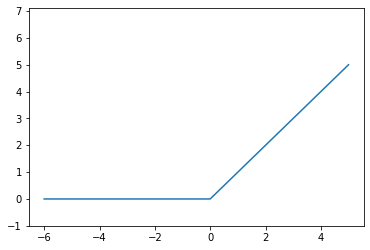

In [14]:
def relu_function(x):
    return np.maximum(0,x)

x = np.arange(-6,6,1)
y = relu_function(x)

plt.plot(x,y)
plt.ylim(-1,7.1)
plt.show()

### 多维数组的运算

In [20]:
a = np.array([[2,4],[5,6]])
b = np.array([[1,2],[3,4]])

c = np.dot(a,b)
print(c.shape)
print(c)


a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([[1],[2],[3]])

print(np.dot(a,b))

(2, 2)
[[14 20]
 [23 34]]
[[14]
 [32]
 [50]]


#### 神经网络的内积

以下图作为简单的神经网络对象，这个网络省略了激活函数和偏置，只有权重；
![神经网络内积](./img/nenul_dot.png)

实现该神经网络时注意X,W,Y的形状，尤其是X、W对应的维度必须相同，这点非常重要！！！！！

In [22]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])

Y = np.dot(X,W)
print(Y)

[ 5 11 17]


### 3层神经网络的实现

以下图作为3层神经网络对象，实现从输入到输出（前向）的处理：

![3层神经网络](./img/three-neural-1.png)
**3层神经网络：输入层（第0层）有两个神经元，第一个隐藏层（第1层）有3个神经元，第二个隐藏层（第2层）有两个神经元，输出层（第3层）有两个神经元。**

#### 符号确认

下图突出显示了从输入层$x_2$到第一层神经元$a_1^{(1)}$的权重。

![3层神经网络](./img/weight-symbol.png)

#### 各层间信号传递的实现

![各层信号传递](./img/signal-transfer.png)

用数学式表示$a_1^{(1)}$,$a_1^{(1)}$通过加权信号和偏置的和按下面进行计算：

$$a_1^{(1)} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + b_1$$

如果使用矩阵的乘法计算：

$$A^{(1)} = XW^{(1)} + B^{(1)}$$

其中，$A^{(1)}、X、B^{(1)}、W^{(1)}$ 如下所示：
![3层神经网络](./img/three-neural-2.png)

用Numpy来实现上式子：

![从输入层到第1层的信号传递](./img/three-neural-3.png)

In [32]:
import numpy as np

X = np.array([1.0,0.5])
B1 = np.array([0.1,0.2,0.3])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])

A1 = np.dot(X,W1) + B1
print(A1)

Z1 = sigmoid_function(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


从第一层到第二层的信号传递：
![从第1层到第2层传递](./img/three-neural-4.png)

In [29]:
B2 = np.array([0.1,0.2])
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])

A2 = np.dot(Z1,W2) + B2
print(A2)

Z2 = sigmoid_function(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


从第2层到输出层的信号传递：
![从输入层到第1层的信号传递](./img/three-neural-5.png)

In [31]:
B3 = np.array([0.1,0.2])
W3 = np.array([[0.1,0.3],[0.2,0.4]])

A3 = np.dot(W3,Z2) + B3
print(A3)

def identity_function(x):
    return x

Y = identity_function(A3)
print(Y)

[0.39392815 0.63365415]
[0.39392815 0.63365415]


#### 代码实现小结

In [46]:
def init_network():
    network={}
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["b1"] = np.array([0.1, 0.2, 0.3])
    
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([[0.1, 0.2]])
    
    return network


def forward(network,x):
    W1,W2,W3 = network["W1"],network["W2"],network["W3"]
    b1,b2,b3 = network["b1"],network["b2"],network["b3"]
    
    A1 = np.dot(x,W1) + b1
    Z1 = sigmoid_function(A1)
    
    A2 = np.dot(Z1,W2) + b2
    Z2 = sigmoid_function(A2)
    
    A3 = np.dot(Z2,W3) + b3    
    
    y = identity_function(A3)
    return y
    
    

In [47]:
network = init_network()
# print(network)
x = np.array([1.0, 0.5])
y = forward(network,x)
print(y)

[[0.31682708 0.69627909]]


### 输出层的设计

神经网络可以用在分类问题和回归问题上，需要根据情况改变输出层的激活函数。一般而言，回归问题用恒等函数，分类问题用softmax函数。

> 机器学习的问题大致分为分类问题和回归问题，分类问题是数据属于那一类别的问题，比如区分图片中人物属于男性还是女性，属于分类问题。而回归问题是根据输入预测一个数值问题，例如，根据一个人的图像预测这个人的体重就是回归问题。

#### 恒等函数和softmax函数

恒等函数会将输入按原样输出，对于输入的信息，不加任何改动，按照原样输出。因此在输出层使用恒等函数，输入信号会原封不动地输出。恒等函数用神经网络图来表示，恒等函数的处理可以用一根箭头来表示，如下：

![恒等函数](./img/hengdeng_function.png)

分类问题的softmax函数可以使用下面的式子表示：

![softmax函数](./img/softmax_function.png)
exp(x) 是 $e^x$的指数函数（e是纳皮尔常数 2.7182....），上式表示，假设输出层共有n个神经元，计算第k个神经元的输出$y_k$，softmax函数的分子是输入信号$a_k$的指数函数，分母是所有输入信号的指数函数的和。

用图表示softmax函数，softmax函数的输出通过箭头和所有的输入信号相连。由下图可知，输出的各个神经元都收到输入信号的影响。

![softmax函数](./img/softmax_function_neural.png)

softmax python实现：
```py
def softmax(x):
    exp_a = np.exp(x)
    sum_exp_a = np.sum(a)
    y = exp_a / sum_exp_a
    return y
```

In [50]:
a = np.array([0.3,2.9,4.0])
exp_a = np.exp(a)
sum_exp_a = np.sum(a)

y = exp_a / sum_exp_a
print(y)

[0.18748039 2.52418686 7.58307639]


### 实现softmax函数时的注意事项

softmax函数的实现中要进行指数运算，指数函数的值会变得非常大，$e^{10}$的值会超过2000，$e^{1000}$的值表示无穷大的 inf，如果在这些超大值之间进行除法运算，会出现不确定的情况。

对公式可以进行如下改进：

![softmax函数的改进](./img/softmax_function_1.png)

这里的C'可以试任何值，但是为了防止溢出，一般会使用输入信号的最大值。

In [54]:
a = np.array([1010, 1000, 990])
exp_a_1 = np.exp(a)
sum_exp_a_1 = np.sum(exp_a_1)
y_1 = exp_a_1 / sum_exp_a_1
print(y_1) # [nan nan nan]  输出 not a number 没有被正确计算

c = np.max(a)
exp_a = np.exp(a-c) # 溢出对策
sum_exp_a = np.sum(exp_a)
y = exp_a / sum_exp_a
print(y) # [9.99954600e-01 4.53978686e-05 2.06106005e-09] 

[nan nan nan]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


D:\install\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [55]:
def softmax(x):
    c = np.max(x)
    exp_a = np.exp(x - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [57]:
print(softmax(a))

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


#### softmax函数的特征

使用softmax函数，可以如下方式计算神经网络的输出：

In [58]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


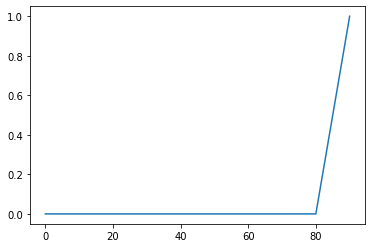

In [66]:
import matplotlib.pylab as plt

x = np.arange(0.0,100,10)
y = np.exp(x-100) / np.sum(np.exp(x-100))

plt.plot(x,y)
plt.show()

由上可知，softmax函数输出的是 0到1.0 之间的实数，**softmax函数输出值的总和是1，这是一个重要的特征**。正因为有这个性质，才可以将softmax函数的输出解释为“概率”。

上面的例子：y[0] 的概率为 0.018（1.8%），从概率上看，y[2] 的概率最高，所以答案是第3个类别，还可以回答 1% 为第1个类别，24%为第2个类别，74%为第3个类别。